In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./president_heights.csv')
df.head(10)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [3]:
df.tail(10)

,order,name,height(cm)
32,35,John F. Kennedy,183
33,36,Lyndon B. Johnson,193
34,37,Richard Nixon,182
35,38,Gerald Ford,183
36,39,Jimmy Carter,177
37,40,Ronald Reagan,185
38,41,George H. W. Bush,188
39,42,Bill Clinton,188
40,43,George W. Bush,182
41,44,Barack Obama,185


In [9]:
df2 = df.tail(10)[['height(cm)']]

In [10]:
df1 = df.iloc[0:len(df)-10][['height(cm)']]
len(df1)

32

In [11]:
len(df)

42

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
# Independent T-Test
t,p = stats.ttest_ind(df2, df1)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

t-statistic:[2.69562114]
p-value:0.005113


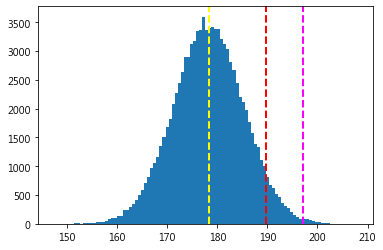

In [16]:
pop = np.random.normal(df1.mean(), df1.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, df1.mean(), df1.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

In [17]:
mean1 = df['height(cm)'].mean()
# T-Test
t,p = stats.ttest_1samp(df2, mean1)
# ttest_1samp is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
## 除以2的原因，在下段說明中解釋。
p1 = '%f' % (p/2)
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

t-statistic:[3.53340083]
p-value:0.003190


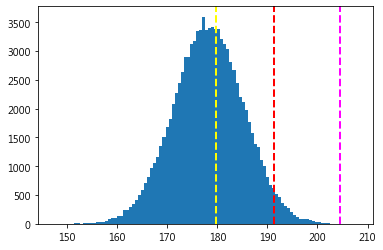

In [20]:
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
std = df['height(cm)'].std()
ci = stats.norm.interval(0.90, mean1, std)
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(mean1, color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(mean1 + t* std, color='magenta', linestyle='dashed', linewidth=2)
plt.show()